In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
%matplotlib inline

# Wind Plant

In [52]:
df = pd.read_csv (r'C:\Users\212560139\Documents\AppDev Summative\wind_generation_data.csv' )
print (df)

     wind speed  direction  Power Output
0         16.00        218         34.76
1         15.91        218         36.59
2         15.82        218         32.35
3         15.73        218         39.37
4         15.64        218         33.22
..          ...        ...           ...
361       10.59        233         40.49
362       10.36        233         34.65
363       10.12        234         39.53
364        9.87        234         32.29
365        9.62        234         40.46

[366 rows x 3 columns]


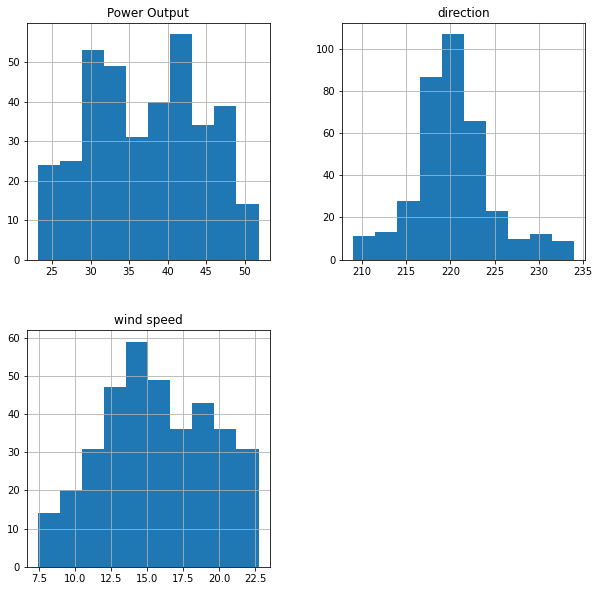

In [53]:
pd.DataFrame.hist(df, figsize=(10,10));

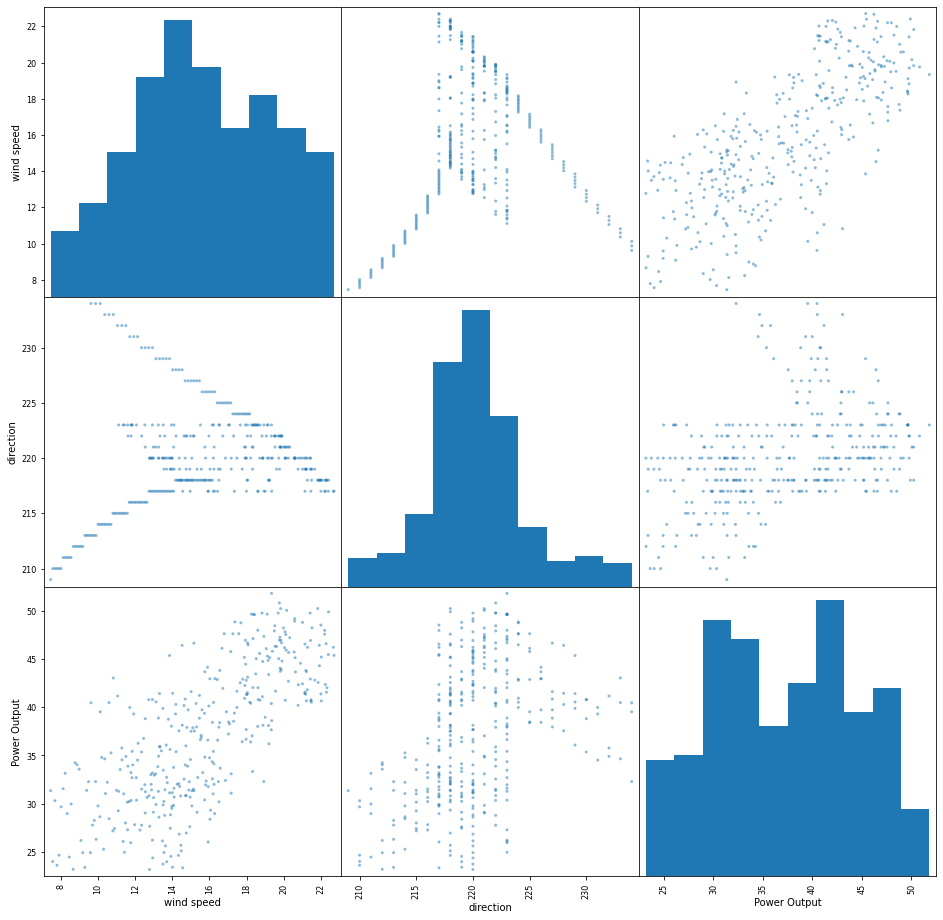

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(16,16));

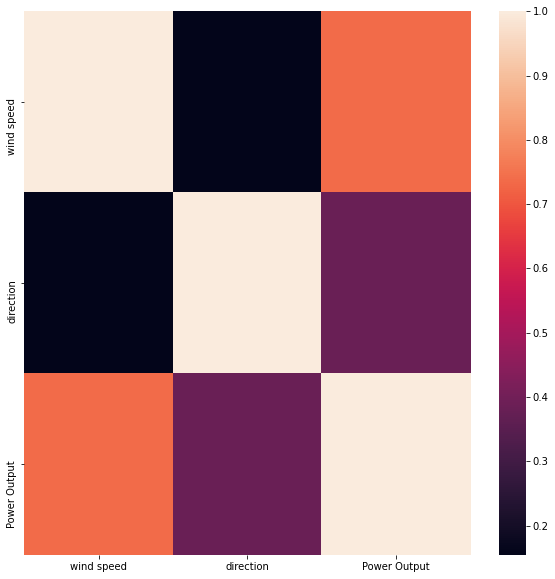

In [55]:
#c = df.corr().abs()
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [56]:
X = df[['wind speed','direction']].values
Y = df['Power Output'].values

In [57]:
labels = ['wind speed','direction']; labels

['wind speed', 'direction']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Decision Tree

In [60]:
#model = RandomForestRegressor(n_jobs=-1, min_impurity_decrease=10)
model = RandomForestRegressor(n_jobs=-1)

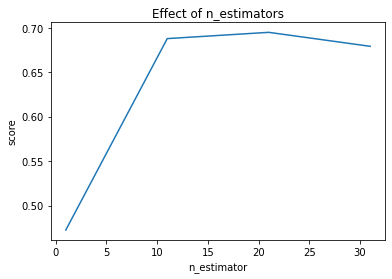

In [61]:
# Try different numbers of n_estimators or trees - this will take a minute or so
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [62]:
y_predicted = model.predict(X_test)

In [63]:
len(y_predicted), len(y_test)

(92, 92)

In [64]:
from sklearn.metrics import r2_score

In [65]:
score = r2_score(y_test, y_predicted)
score

0.6793148254706318

# Solar Plant

In [66]:
data = pd.read_csv (r'C:\Users\212560139\Documents\AppDev Summative\solar_generation_data.csv' )
print (data)

    Month   Day Temp Hi Temp Low  Solar  Cloud Cover Percentage  \
0      Jan    1    109°      85°   30.0                       9   
1      Jan    2    106°      71°   30.1                       9   
2      Jan    3    106°      81°   29.5                       9   
3      Jan    4    102°      83°   13.0                       4   
4      Jan    5    105°      80°   30.1                       9   
..     ...  ...     ...      ...    ...                     ...   
360    Dec   27    101°      83°   26.4                       8   
361    Dec   28    102°      84°   25.8                       8   
362    Dec   29    104°      83°   26.9                       8   
363    Dec   30    105°      80°   25.1                       8   
364    Dec   31    108°      81°   29.0                       9   

     Rainfall in mm  Power Generated in MW  
0               0.0                   9.93  
1               0.0                   9.97  
2               0.0                   9.77  
3              

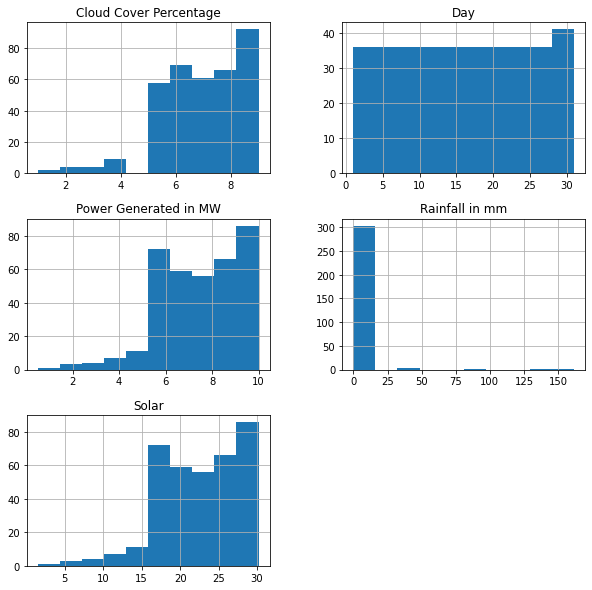

In [67]:
pd.DataFrame.hist(data, figsize=(10,10));

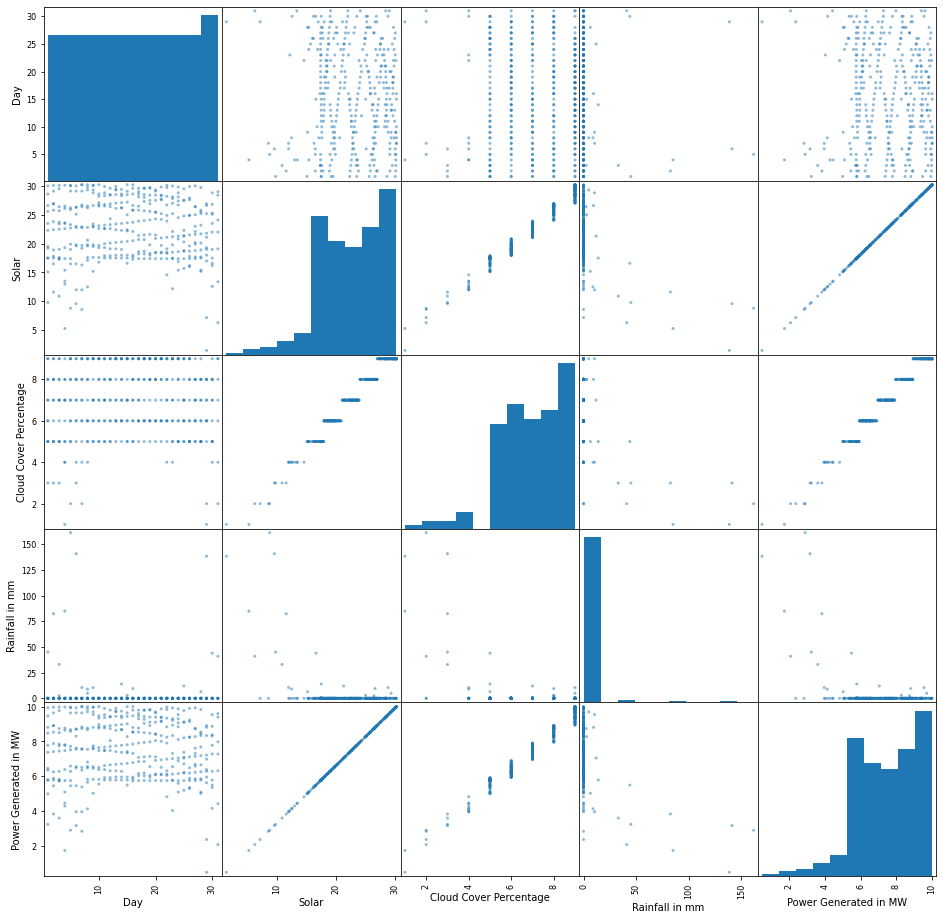

In [68]:
scatter_matrix(data, figsize=(16,16));

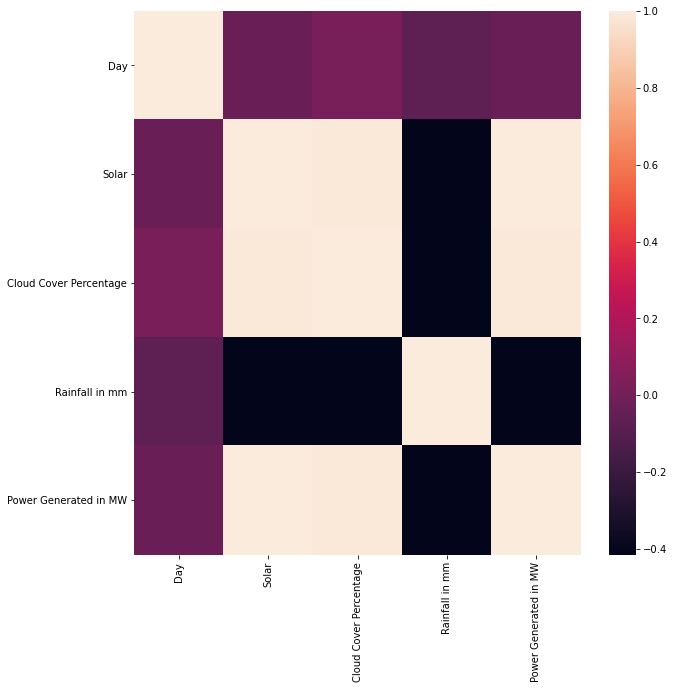

In [69]:
#c = df.corr().abs()
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [70]:
X1 = data[['Day', 'Solar', 'Cloud Cover Percentage', 'Rainfall in mm']].values
Y1 = data['Power Generated in MW'].values

In [71]:
labels = ['Day', 'Solar', 'Cloud Cover Percentage', 'Rainfall in mm']; labels

['Day', 'Solar', 'Cloud Cover Percentage', 'Rainfall in mm']

In [72]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

### XGBoost

In [73]:
import xgboost as xgb

In [74]:
model = xgb.XGBRegressor()

In [75]:
model.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y1_preds = model.predict(X1_test)

In [77]:
predictions = [round(i) for i in y1_preds]

In [78]:
from sklearn.metrics import explained_variance_score

In [79]:
print(explained_variance_score(predictions,y1_test))

0.9699826786214479


# Cross Validate the model

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [81]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X1, Y1, cv=kfold)
print("Accuracy: ", results.mean())

C:\Users\212560139\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Accuracy:  0.9905658201101447


### Storing the ML model as a file so you can save it to use later (or in another computer)

In [82]:
import pickle

In [83]:
filename = 'finalized_models.sav'
pickle.dump(model, open(filename, 'wb'))